# Carbon Tax Observations

### CS2545 - Data Science ###
### Winter, 2025 ###
### UNB, Fredericton ###
<br>

#### Group Members 

Chi Seng, Cheang | 3762588

Riley, Legere | 3756232

Matthew, Chiasson | 3725675



#### Project Proposal :
Economic activities and cost analysis in Canada
(Analyzing grocery price trends)

#### Issues addressed:  
Concerns about rising grocery costs in Canada (Reasons/Causes) since the genesis of carbon Tax.
Methodology: We will look at price trends in grocery costs throughout the year with a focus on the transition between first to second quarter (the tax season). Our approach will be mostly concerned with animal products that have a large carbon footprint. We are also interested in how the Carbon Tax affects other food products, say those that involve heavy transportation costs; Like Seafood. 


# Data Set Sources:

> [Industrial product price index, food and beverage products, monthly:](https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=1810026603)

> [Raw materials price index for crop products, animals and animal products, monthly:](https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=181002680)

> [Monthly average retail prices for selected products: Food](https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=1810024502)

Plan: 
source when carbon tax was implemented in 2016 and how much 

source how hard canadian farmers where impacted

Source the base inflation rate over the years 2015 - 2019 (done)

create dataframes for prices over the years 2015 - 2019 (done)

find mean price increasce and mean inflation rate. subtract inflation from price increace.



# Introduction
Our project aims to analyze the price trends on grocery items and its root cause, with a heavy emphasis on the relevance of Carbon Tax onto the Canadian economy. We hypothesize that since the introduction of the Carbon Tax on a federal level in 2019 (some provinces have had Carbon Tax since 2016 [1]), grocery prices have been steadily rising due to fuel consumption and a rising population; Paired with the Covid-19 pandemic, prices of groceries have since been increased to new heights and have not been decreasing gradually as much as its causes have been increasing. 

## Project Goal

For the goal of this project we aim to show the impact that the carbon tax has had on the cost of our groceries from 2019 (the time Carbon tax was imposed nation wide) to 2024 (Date farmers recived exemtion on certain items). To do this we will first get the inflation rate for each year, then the mean cost increase of groceries for that year. Then we can compare how much the cost increase was due to inflation that yean and can attribute the rest to the carbon tax (and other factors that will be explored).

## Base inflation rates

Inflation is defined as the rate where the cost of products increase or the rate in which a currency depreciates relative to its purchasing power. The preferred global inflation rate of many governments have been kept at approximately 2% annually to stimulate economic growth which is the case for Canada as well. A manageable inflation rate can be used to spur investments and economic growth despite its common association with risks such as weakening currency.

Canada's inflation rate is measured using the Consumer Price Index(CPI), which is calculated annually and weighted against a basis year such as 2002. Our report will focus on comparing the CPI of earlier time periods against the time period after Carbon Tax was introduced in order to gain a better understanding of its role in grocery price inflation. Historically Canada's inflation rate was kept around 2% per annum, as shown by the line chart below.

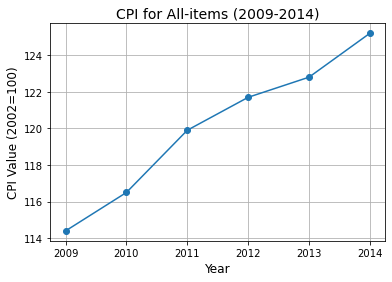

In [53]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import thinkstats2
import thinkplot

cpi_2009 = pd.read_csv('Sources/2009-2014CPI.csv', sep=',', skiprows=10, nrows=16)
cpi_2009 = cpi_2009.dropna()

first_row = cpi_2009.iloc[0]
years = ['2009', '2010', '2011', '2012', '2013', '2014']
values = first_row.iloc[1:7].values

plt.plot(years, values, marker='o')
product_name = first_row.iloc[0]  
plt.title(f"CPI for {product_name} (2009-2014)", fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('CPI Value (2002=100)', fontsize=12)
plt.grid(True)
plt.show()

As shown on the chart above, we are able to deduce that for the time period (2009-2014), the CPI increased from 114 to 124 which supports our claim of a 2% annual increment.

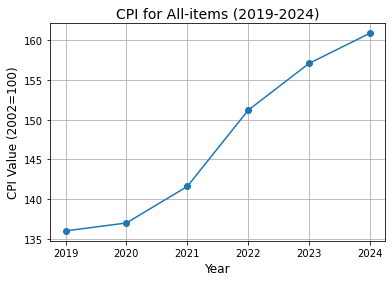

In [54]:
cpi_2019 = pd.read_csv('Sources/2019-2024CPI.csv', sep=',', skiprows=10, nrows=16)
cpi_2019 = cpi_2019.dropna()

first_row_19 = cpi_2019.iloc[0]
years_19 = ['2019', '2020', '2021', '2022', '2023', '2024']
values_19 = first_row_19.iloc[1:7].values

plt.plot(years_19, values_19, marker='o')
product_name = first_row.iloc[0]  
plt.title(f"CPI for {product_name} (2019-2024)", fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('CPI Value (2002=100)', fontsize=12)
plt.grid(True)
plt.show()

Moving on, the second time period(2019-2024) has shown a much more drastic increase likely due to the covid-19 pandemic. The total increment of this time period is roughly 30 points which gives us an average of 5% per annum which is a significant increase from the previous time period. 

We are able to deduce that after the implementation of the Carbon Tax, assuming that other external factors does not play a massive role in inflation; That grocery prices were negatively affected(rising price).

## Introduction of the Carbon Tax

Canada introduced a nationwide carbon pricing system in 2019, establishing a federal minimum price on carbon pollution starting at $20 per tonne. This system ensured that all provinces and territories had carbon pricing in place, either through their own compliant systems or the federal "backstop," aligning with national benchmark standards [[3]](https://www.canada.ca/en/environment-climate-change/services/climate-change/pricing-pollution-how-it-will-work/carbon-pollution-pricing-federal-benchmark-information.html).


## Tax on the farmers

Farmers are paying significant amounts in carbon tax, with livestock farmers averaging $726 per month and crop farmers around $2,024, according to the ACA. Greenhouse operators face the highest costs, averaging $17,173 monthly, with carbon tax making up as much as 40% of some farmers' energy expenses [[4]](https://www.taxpayer.com/newsroom/majority-of-canadians-want-carbon-tax-scrapped-on-farms#:~:text=The%20average%20livestock%20farmer%20can,cost%20is%20just%20carbon%20tax.).  To help offset these costs, the federal government introduced a refundable tax credit for farming businesses in provinces where the federal fuel charge applies. Eligible farmers can claim this credit for fuel expenses incurred in 2023, with the exemption taking effect for Atlantic provinces on July 1, 2023 [[5]](https://www.canada.ca/en/department-finance/programs/tax-policy/tax-credit-payment-rates-to-return-fuel-charge-proceeds-to-farmers-for-2023-24.html).



# Relavent Taxes:

Note: i think the source for the following is the same for the dataset below! (Carbon tax rates.csv i mean)

The fuel charge we are concerned about applies to marketable natural gas, not non-marketable natural gas [[6]](https://www.canada.ca/en/revenue-agency/services/forms-publications/publications/fcrates/fuel-charge-rates.html). So we will be dropping all but the relavent fields from the following carbon tax dataset:

"The rates applied in Alberta, Manitoba, Ontario, and Saskatchewan from April 1, 2019 to March 31, 2025.

New Brunswick ceased to be a listed province effective April 1, 2020, and the fuel charge was reintroduced on July 1, 2023. As such, the rates applied in New Brunswick from April 1, 2019 to March 31, 2020, and from July 1, 2023 to March 31, 2025. 

The rates applied in Newfoundland and Labrador, Nova Scotia, and Prince Edward Island from July 1, 2023 to March 31, 2025." [[6]](https://www.canada.ca/en/revenue-agency/services/forms-publications/publications/fcrates/fuel-charge-rates.html).

To determine which types of emissions would affect farmers under the Canadian carbon tax (ignoring exemptions), we need to focus on the fuels commonly used in agricultural operations such as for heating, drying crops, and running machinery.

### Fuels Likely to Affect Farmers:
- Gasoline – Used in farm vehicles and equipment (e.g., tractors, generators).

- Diesel (not explicitly listed, but possibly covered under Light/Heavy Fuel Oil):

- Light fuel oil – Often includes diesel; commonly used in farm machinery.

- Heavy fuel oil – Less common in farms but might be used in larger heating systems or equipment.

- Propane – Widely used for heating barns, greenhouses, and drying grain.

- Marketable natural gas – Used for heating and drying operations.

- Butane – Sometimes used in heating and cooking equipment in remote or smaller farms.

- Kerosene – Occasionally used for heating in older or remote systems.

- Pentanes plus / Ethane / Gas liquids – Potentially used in certain industrial or large-scale farming operations.

- Methanol – Rare, but possible in specialty fuel blends or antifreeze systems.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
carbon_tax = pd.read_csv("Sources/Carbon tax rates.csv")
carbon_tax = carbon_tax.dropna()
carbon_tax = carbon_tax.set_index('Type')
# Drop the 'Unit' column
if 'Unit' in carbon_tax.columns:
    carbon_tax = carbon_tax.drop(['Unit'], axis=1)

# Keep only the relevant fuel types
relevant_fuels = [
    'Gasoline',
    'Light fuel oil',
    'Heavy fuel oil',
    'Propane',
    'Marketable natural gas',
    'Kerosene',
    'Butane',
    'Pentanes plus',
    'Ethane',
    'Methanol'
]

carbon_tax = carbon_tax.loc[carbon_tax.index.isin(relevant_fuels)]

carbon_tax


,"April 1, 2019 to March 31, 2020","April 1, 2020 to March 31, 2021","April 1, 2021 to March 31, 2022","April 1, 2022 to March 31, 2023","April 1, 2023 to March 31, 2024","April 1, 2024 to March 31, 2025"
Type,,,,,,
Butane,0.0356,0.0534,0.0712,0.0890,0.1157,0.1424
Ethane,0.0204,0.0306,0.0408,0.0509,0.0662,0.0815
Gasoline,0.0442,0.0663,0.0884,0.1105,0.1431,0.1761
Heavy fuel oil,0.0637,0.0956,0.1275,0.1593,0.2072,0.2550
Kerosene,0.0516,0.0775,0.1033,0.1291,0.1678,0.2065
Light fuel oil,0.0537,0.0805,0.1073,0.1341,0.1738,0.2139
Marketable natural gas,0.0391,0.0587,0.0783,0.0979,0.1239,0.1525
Methanol,0.0220,0.0329,0.0439,0.0549,0.0714,0.0878
Pentanes plus,0.0356,0.0534,0.0712,0.0890,0.1157,0.1424


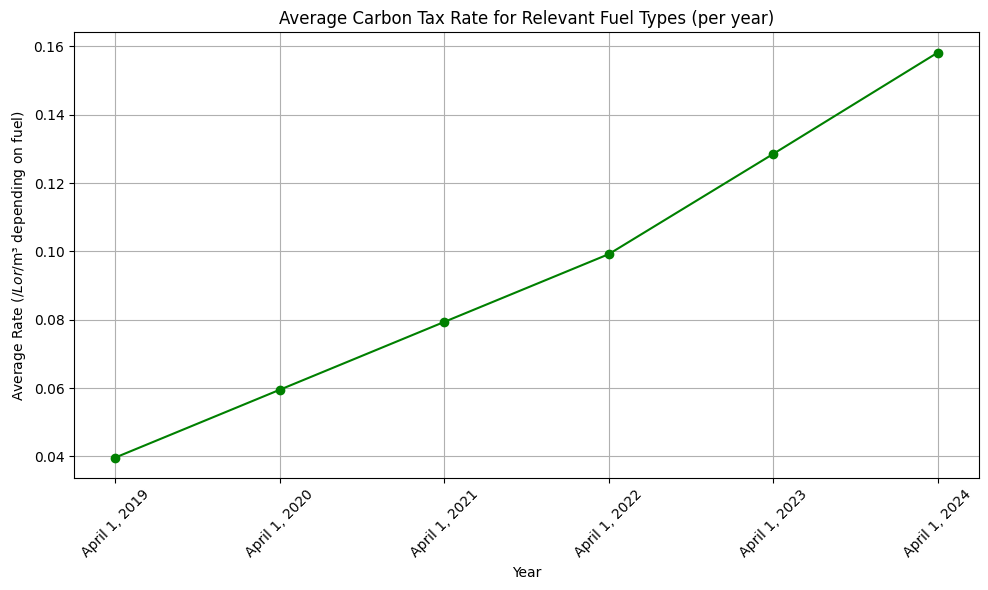

In [2]:
carbon_tax = carbon_tax.loc[carbon_tax.index.isin(relevant_fuels)]

# Compute average rate per year
average_rates = carbon_tax.mean(axis=0)

# Clean up column names for x-axis labels
years = [col.split(" to ")[0] for col in average_rates.index]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(years, average_rates.values, marker='o', linestyle='-', color='green')
plt.title("Average Carbon Tax Rate for Relevant Fuel Types (per year)")
plt.xlabel("Year")
plt.ylabel("Average Rate ($/L or $/m³ depending on fuel)")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# PPI (Product Price Index)

lets first take the avrage of all items

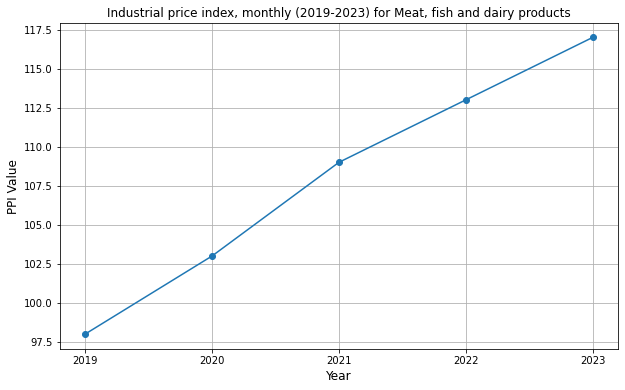

In [70]:
import calendar

ppi = pd.read_csv('Sources/Industrial product price index monthly 2019 - 2023.csv', sep=',', skiprows=9, nrows=16)

first_row_ppi = ppi.iloc[1]
title = first_row_ppi.iloc[0]

ppiVal = pd.to_numeric(first_row_ppi.iloc[1:56].values)
ppi_years = ['2019', '2020', '2021', '2022', '2023']
avg_by_year = []
index = 0

for i in ppi_years[:-1]: #Skip 2023 as it only has 7 months
    end = index + 12
    avg = ppiVal[index:end].mean()
    avg_by_year.append(round(avg))
    index = end

avg_2023 = ppiVal[index:index + 7].mean()
avg_by_year.append(round(avg_2023))

plt.figure(figsize=(10, 6))
plt.plot(ppi_years, avg_by_year, marker='o')
plt.title(f"Industrial price index, monthly (2019-2023) for {title}", fontsize = 12)
plt.xlabel('Year', fontsize=12)
plt.ylabel('PPI Value', fontsize=12)
plt.grid(True)
plt.show()


# Change in inflation rate relative to carbon tax rate


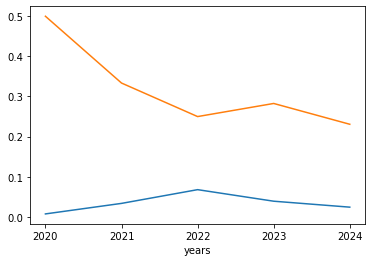

In [74]:
ct_pct = carbon_tax.pct_change(axis=1, periods=1)
ct_pct = ct_pct.mean(axis=0)

df2009 = pd.Series(data=values, index=years)
df2009 = df2009.pct_change()

df2019 = pd.Series(data=values_19, index=years_19)
df2019 = df2019.pct_change()

plt.plot(years_19, df2019.values)
plt.plot(years_19, ct_pct.values)
plt.xlabel('years')
plt.show()


# Sources:

1. https://energynow.ca/2016/12/brief-history-canadian-carbon-tax/
2. https://www.thecanadianencyclopedia.ca/en/article/carbon-pricing-in-canada
3. https://www.canada.ca/en/environment-climate-change/services/climate-change/pricing-pollution-how-it-will-work/carbon-pollution-pricing-federal-benchmark-information.html
4. https://www.taxpayer.com/newsroom/majority-of-canadians-want-carbon-tax-scrapped-on-farms#:~:text=The%20average%20livestock%20farmer%20can,cost%20is%20just%20carbon%20tax.
5. https://www.canada.ca/en/department-finance/programs/tax-policy/tax-credit-payment-rates-to-return-fuel-charge-proceeds-to-farmers-for-2023-24.html
6. https://www.canada.ca/en/revenue-agency/services/forms-publications/publications/fcrates/fuel-charge-rates.html